In [1]:
import warnings
warnings.filterwarnings("ignore")

# 数据清洗

## 判断缺失值

In [31]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                 [np.nan, np.nan, np.nan, 5],
                [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))

df.isna()

,A,B,C,D
0,True,False,True,False
1,False,False,True,False
2,True,True,True,False
3,True,False,True,False


## 缺失值处理

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                  "born": [pd.NaT, pd.Timestamp("1940-04-25"),pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [4]:
# 默认参数：删除行，只要有空值就会删除，不替换。
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [6]:
# 删除指定行或列
df.dropna(axis=1) # 删除缺失列

,name
0,Alfred
1,Batman
2,Catwoman


In [7]:
df.dropna(axis=0)  # 删除缺失行

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [8]:
# 指定所有值全为缺失值时删除，how="all"
df.dropna(how="all") # 删除缺失列

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [9]:
# 指定至少出现过两个缺失值才删除，用（thresh=2）
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [10]:
# 指定删除某个分组中的含有缺失值的行或列
df.dropna(subset=['name','born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                  "born": [pd.NaT, pd.Timestamp("1940-04-25"),pd.NaT]})
# 默认参数：删除行，只要有空值就会删除，不替换。
df.dropna()
# 删除指定行或列
df.dropna(axis=1) # 删除缺失列
df.dropna(axis=0)  # 删除缺失行
# 指定所有值全为缺失值时删除，how="all"
df.dropna(how="all") # 删除缺失列
# 指定至少出现过两个缺失值才删除，用（thresh=2）
df.dropna(thresh=2)
# 指定删除某个分组中的含有缺失值的行或列
df.dropna(subset=['name','born'])

In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                 [np.nan, np.nan, np.nan, 5],
                [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [14]:
# 用缺失值前面的一个值代替缺失值
df.fillna(axis=1,method='ffill') # 以前一列为基准

,A,B,C,D
0,NaN,2.0,2.0,0.0
1,3.0,4.0,4.0,1.0
2,NaN,NaN,NaN,5.0
3,NaN,3.0,3.0,4.0


In [16]:
df.fillna(axis=0,method='ffill') # 以前一行为基准

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [17]:
# 用指定的值进行填充
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [18]:
# 针对不同的列，我们用不同的值填充
trans={"A":9,"B":8,"C":7,"D":6}
df.fillna(value=trans)

,A,B,C,D
0,9.0,2.0,7.0,0
1,3.0,4.0,7.0,1
2,9.0,8.0,7.0,5
3,9.0,3.0,7.0,4


In [19]:
# 替换值限制为每列只替换一次
trans={"A":9,"B":8,"C":7,"D":6}
df.fillna(value=trans,limit=1)

,A,B,C,D
0,9.0,2.0,7.0,0
1,3.0,4.0,NaN,1
2,NaN,8.0,NaN,5
3,NaN,3.0,NaN,4


In [27]:
# 使用均值mean( )的方法进行缺失值填充
df.fillna(df.mean())

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


In [28]:
df.interpolate() # 高级插值函数

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.5,NaN,5
3,3.0,3.0,NaN,4


In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                 [np.nan, np.nan, np.nan, 5],
                [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
# 用缺失值前面的一个值代替缺失值
df.fillna(axis=1,method='ffill') # 以前一列为基准
df.fillna(axis=0,method='ffill') # 以前一行为基准
# 用指定的值进行填充
df.fillna(0)
# 针对不同的列，我们用不同的值填充
trans={"A":9,"B":8,"C":7,"D":6}
df.fillna(value=trans)
# 替换值限制为每列只替换一次
trans={"A":9,"B":8,"C":7,"D":6}
df.fillna(value=trans,limit=1)
# 使用均值mean( )的方法进行缺失值填充
df.fillna(df.mean())

In [29]:
??df.fillna

## 异常值处理

In [1]:
import pandas as pd
import numpy as np
tips = pd.read_csv('data/tips.csv')
# 使用均值和标准差进行判断
tipmean=tips['tip'].mean()
tipstd = tips['tip'].std()
topnum1 =tipmean+2*tipstd
bottomnum1 = tipmean-2*tipstd
print("正常值的范围：",topnum1,bottomnum1)
print("是否存在超出正常范围的值：",any(tips['tip']>topnum1))
print("是否存在小于正常范围的值：",any(tips['tip']<bottomnum1))

正常值的范围： 5.7655550665269555 0.23100231052222497
是否存在超出正常范围的值： True
是否存在小于正常范围的值： False


In [2]:
# 使用上四中位数和下四中位数进行异常值判定
mean1 = tips['tip'].quantile(q=0.25)#下四分位差
mean2 = tips['tip'].quantile(q=0.75)#上四分位差
mean3 = mean2-mean1#中位差
topnum2 = mean2+1.5*mean3
bottomnum2 = mean2-1.5*mean3
print("正常值的范围：",topnum2,bottomnum2)
print("是否存在超出正常范围的值：",any(tips['tip']>topnum2))
print("是否存在小于正常范围的值：",any(tips['tip']<bottomnum2))

正常值的范围： 5.906249999999998 1.2187500000000004
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


In [3]:
import matplotlib.pyplot as plt
plt.boxplot(x=tips['tip'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
# 通常的处理方式是取数据中的最大最小值进行异常值替换
replace_value1=tips['tip'][tips['tip']<topnum2].max()
tips.loc[tips['tip']>topnum2,'tip']=replace_value1
replace_value2=tips['tip'][tips['tip']>bottomnum2].min()
tips.loc[tips['tip']<bottomnum2,'tip']=replace_value2

正常值的范围： 5.7655550665269555 0.23100231052222497
是否存在超出正常范围的值： True
是否存在小于正常范围的值： False
正常值的范围： 5.906249999999998 1.2187500000000004
是否存在超出正常范围的值： True
是否存在小于正常范围的值： True


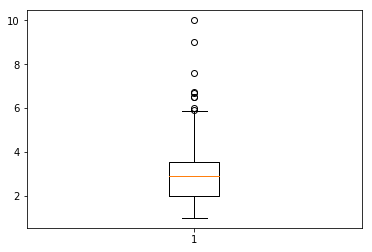

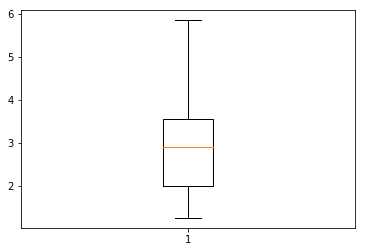

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tips = pd.read_csv('data/tips.csv')
# 使用均值和标准差进行判断
tipmean=tips['tip'].mean()
tipstd = tips['tip'].std()
topnum1 =tipmean+2*tipstd
bottomnum1 = tipmean-2*tipstd
print("正常值的范围：",topnum1,bottomnum1)
print("是否存在超出正常范围的值：",any(tips['tip']>topnum1))
print("是否存在小于正常范围的值：",any(tips['tip']<bottomnum1))
# 使用上四中位数和下四中位数进行异常值判定
mean1 = tips['tip'].quantile(q=0.25)#下四分位差
mean2 = tips['tip'].quantile(q=0.75)#上四分位差
mean3 = mean2-mean1#中位差
topnum2 = mean2+1.5*mean3
bottomnum2 = mean2-1.5*mean3
print("正常值的范围：",topnum2,bottomnum2)
print("是否存在超出正常范围的值：",any(tips['tip']>topnum2))
print("是否存在小于正常范围的值：",any(tips['tip']<bottomnum2))
# 可视化异常值
plt.boxplot(x=tips['tip'])
plt.show()
# 通常的处理方式是取数据中的最大最小值进行异常值替换
replace_value1=tips['tip'][tips['tip']<topnum2].max()
tips.loc[tips['tip']>topnum2,'tip']=replace_value1
replace_value2=tips['tip'][tips['tip']>bottomnum2].min()
tips.loc[tips['tip']<bottomnum2,'tip']=replace_value2
# 可视化异常值
plt.boxplot(x=tips['tip'])
plt.show()

In [11]:
import pywt
ecg = tips['tip'].values
def pywt_wave(ecg):
    index = []
    data = []
    for i in range(len(ecg)-1):
        X = float(i)
        Y = float(ecg[i])
        index.append(X)
        data.append(Y)
    w = pywt.Wavelet('db8') # 选用Daubechies8小波
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    print("maximum level is " + str(maxlev))
    threshold = 0.1 # 过滤（阈值）
    coeffs = pywt.wavedec(data, 'db8', level=maxlev) # 将信号进行小波分解
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i])) # 将噪声滤波
    datarec = pywt.waverec(coeffs, 'db8') # 将信号进行小波重构
    return datarec
datarec = pywt_wave(ecg)
# 可视化异常值
plt.boxplot(x=datarec)
plt.show()

maximum level is 4


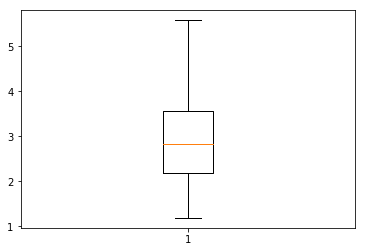

In [12]:
# 可视化异常值
plt.boxplot(x=datarec)
plt.show()

In [13]:
from pyod.models.knn import KNN   # imprt kNN分类器
data = tips['tip']
# 训练一个kNN检测器
clf_name = 'kNN'
clf = KNN() # 初始化检测器clf
clf.fit(data) # 使用X_train训练检测器clf
# 返回训练数据X_train上的异常标签和异常分值
y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)
data['labels']  = y_train_pred
data['scores']  = y_train_scores

ModuleNotFoundError: No module named 'pyod'

## 数据一致性

In [75]:
import pandas as pd
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                  "born": ["1949-10-01","1982-11-01 6:00", "1990-12-31 12:00:00"]})
df['born'] = pd.to_datetime(df['born']) # str转换为datetime格式
print(df)

       name        toy                born
0    Alfred        NaN 1949-10-01 00:00:00
1    Batman  Batmobile 1982-11-01 06:00:00
2  Catwoman   Bullwhip 1990-12-31 12:00:00


       name        toy                born
0    Alfred        NaN 1949-10-01 00:00:00
1    Batman  Batmobile 1982-11-01 06:00:00
2  Catwoman   Bullwhip 1990-12-31 12:00:00


In [73]:
??pd.to_datetime

# 数据变换

## 二元化

In [76]:
# 二元化
from sklearn.preprocessing import Binarizer
def test_Binarizer():
    X=[   [1,2,3,4,5],
          [5,4,3,2,1],
          [3,3,3,3,3,],
          [1,1,1,1,1] ]
    print("before transform:",X)
    binarizer=Binarizer(threshold=2.5)
    print("after transform:",binarizer.transform(X))
test_Binarizer()

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]]
after transform: [[0 0 1 1 1]
 [1 1 1 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]]


In [79]:
??Binarizer

## 独热码编码

In [80]:
# 独热码编码
from sklearn.preprocessing import OneHotEncoder
def test_OneHotEncoder():
    X=[   [1,2,3,4,5],
          [5,4,3,2,1],
          [3,3,3,3,3,],
          [1,1,1,1,1] ]
    print("before transform:",X)
    encoder=OneHotEncoder(sparse=False)
    encoder.fit(X)
    print("active_features_:",encoder.active_features_)
    print("feature_indices_:",encoder.feature_indices_)
    print("n_values_:",encoder.n_values_)
    print("after transform:",encoder.transform( [[1,2,3,4,5]]))
test_OneHotEncoder()

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]]
active_features_: [ 1  3  5  7  8  9 10 12 14 16 17 18 19 21 23 25]
feature_indices_: [ 0  6 11 15 20 26]
n_values_: [6 5 4 5 6]
after transform: [[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]]


E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function feature_indices_ is deprecated; The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function n_values_ is deprecated; The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


In [81]:
??OneHotEncoder

## 标准化

In [82]:
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,StandardScaler
# min-max标准化
def test_MinMaxScaler():
    X=[   [1,5,1,2,10],
      [2,6,3,2,7],
      [3,7,5,6,4,],
      [4,8,7,8,1] ]
    print("before transform:",X)
    scaler=MinMaxScaler(feature_range=(0,2))
    scaler.fit(X)
    print("min_ is :",scaler.min_)
    print("scale_ is :",scaler.scale_)
    print("data_max_ is :",scaler.data_max_)
    print("data_min_ is :",scaler.data_min_)
    print("data_range_ is :",scaler.data_range_)
    print("after transform:",scaler.transform(X))
test_MinMaxScaler()

before transform: [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]]
min_ is : [-0.66666667 -3.33333333 -0.33333333 -0.66666667 -0.22222222]
scale_ is : [0.66666667 0.66666667 0.33333333 0.33333333 0.22222222]
data_max_ is : [ 4.  8.  7.  8. 10.]
data_min_ is : [1. 5. 1. 2. 1.]
data_range_ is : [3. 3. 6. 6. 9.]
after transform: [[0.         0.         0.         0.         2.        ]
 [0.66666667 0.66666667 0.66666667 0.         1.33333333]
 [1.33333333 1.33333333 1.33333333 1.33333333 0.66666667]
 [2.         2.         2.         2.         0.        ]]


In [83]:
??MinMaxScaler

In [84]:
def test_MaxAbsScaler():
    X=[   [1,5,1,2,10],
      [2,6,3,2,7],
      [3,7,5,6,4,],
      [4,8,7,8,1] ]
    print("before transform:",X)
    scaler=MaxAbsScaler()
    scaler.fit(X)
    print("scale_ is :",scaler.scale_)
    print("max_abs_ is :",scaler.max_abs_)
    print("after transform:",scaler.transform(X))
test_MaxAbsScaler()

before transform: [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]]
scale_ is : [ 4.  8.  7.  8. 10.]
max_abs_ is : [ 4.  8.  7.  8. 10.]
after transform: [[0.25       0.625      0.14285714 0.25       1.        ]
 [0.5        0.75       0.42857143 0.25       0.7       ]
 [0.75       0.875      0.71428571 0.75       0.4       ]
 [1.         1.         1.         1.         0.1       ]]


In [86]:
??MaxAbsScaler

In [87]:
# StandardScaler
def test_StandardScaler():
    X=[   [1,5,1,2,10],
      [2,6,3,2,7],
      [3,7,5,6,4,],
      [4,8,7,8,1] ]
    print("before transform:",X)
    scaler=StandardScaler()
    scaler.fit(X)
    print("scale_ is :",scaler.scale_)
    print("mean_ is :",scaler.mean_)
    print("var_ is :",scaler.var_)
    print("after transform:",scaler.transform(X))
test_StandardScaler()

before transform: [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]]
scale_ is : [1.11803399 1.11803399 2.23606798 2.59807621 3.35410197]
mean_ is : [2.5 6.5 4.  4.5 5.5]
var_ is : [ 1.25  1.25  5.    6.75 11.25]
after transform: [[-1.34164079 -1.34164079 -1.34164079 -0.96225045  1.34164079]
 [-0.4472136  -0.4472136  -0.4472136  -0.96225045  0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136   0.57735027 -0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079  1.34715063 -1.34164079]]


In [88]:
??StandardScaler

## 正则化

In [89]:
# 正则化
from sklearn.preprocessing import Normalizer
def test_Normalizer():
    X=[   [1,2,3,4,5],
          [5,4,3,2,1],
          [1,3,5,2,4,],
          [2,4,1,3,5] ]
    print("before transform:",X)
    normalizer=Normalizer(norm='l2')
    print("after transform:",normalizer.transform(X))
test_Normalizer()

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [1, 3, 5, 2, 4], [2, 4, 1, 3, 5]]
after transform: [[0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]
 [0.67419986 0.53935989 0.40451992 0.26967994 0.13483997]
 [0.13483997 0.40451992 0.67419986 0.26967994 0.53935989]
 [0.26967994 0.53935989 0.13483997 0.40451992 0.67419986]]


In [90]:
??Normalizer

# 数据降维

## PCA

explained variance ratio : [0.92461872 0.05306648 0.01710261 0.00521218]


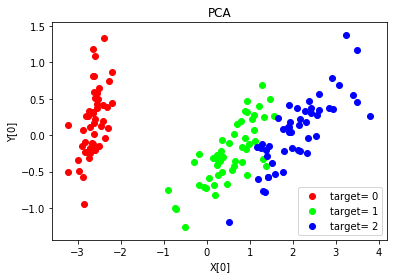

In [91]:
# PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,decomposition
# 加载数据集
iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
X,y = iris.data,iris.target
def test_PCA(*data):
    X,y=data
    pca=decomposition.PCA(n_components=None) # 使用默认的 n_components
    pca.fit(X)
    print('explained variance ratio : %s'% str(pca.explained_variance_ratio_))
def plot_PCA(*data):
    X,y=data
    pca=decomposition.PCA(n_components=2) # 目标维度为2维
    pca.fit(X)
    X_r=pca.transform(X) # 原始数据集转换到二维
    ###### 绘制二维数据 ########
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),) # 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()
test_PCA(X,y)   # 调用 test_PCA
plot_PCA(X,y)   # 调用 plot_PCA

In [8]:
help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of com

## LDA

In [14]:
# LDA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [11]:
# 加载数据集
iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
X,y = iris.data,iris.target

In [19]:
def plot_LDA(*data):
    X,y=data
    LDA2=LDA( n_components=2)
    LDA2.fit(X,y)
    X_r=LDA2.transform(X) # 原始数据集转换到二维
    ###### 绘制二维数据 ########
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),) # 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("LDA")
    plt.show()

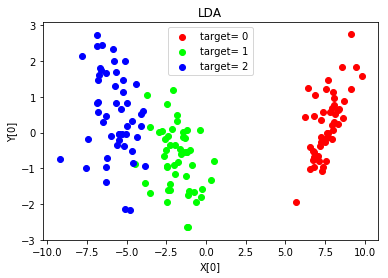

In [20]:
plot_LDA(X,y)   # 调用 plot_LDA

In [27]:
# solver对预测能力的影响
from sklearn.model_selection import train_test_split
from sklearn import discriminant_analysis
def test_LinearDiscriminantAnalysis_solver(*data):
    X_train,X_test,y_train,y_test=data
    solvers=['svd','lsqr','eigen']
    for solver in solvers:
        if(solver=='svd'):
            lda=discriminant_analysis.LinearDiscriminantAnalysis(solver=solver)
        else:
            lda=discriminant_analysis.LinearDiscriminantAnalysis(solver=solver,shrinkage=None)
        lda.fit(X_train,y_train)
        print('Score at solver=%s:%.2f'%(solver,lda.score(X_test,y_test)))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)
test_LinearDiscriminantAnalysis_solver(X_train,X_test,y_train,y_test)

Score at solver=svd:1.00
Score at solver=lsqr:1.00
Score at solver=eigen:1.00


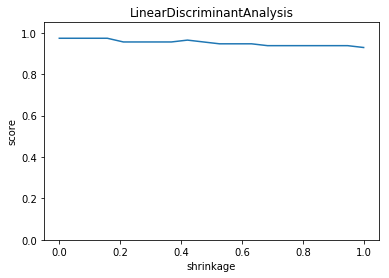

In [28]:
def test_LinearDiscriminantAnalysis_shrinkage(*data):
    X_train,X_test,y_train,y_test=data
    shrinkages=np.linspace(0.0,1.0,num=20)
    scores=[]
    for shrinkage in shrinkages:
        lda=discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr',
        shrinkage=shrinkage)
        lda.fit(X_train,y_train)
        scores.append(lda.score(X_train,y_train))
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(shrinkages,scores)
    ax.set_xlabel(r'shrinkage')
    ax.set_ylabel(r'score')
    ax.set_ylim(0,1.05)
    ax.set_title('LinearDiscriminantAnalysis')
    plt.show()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)
test_LinearDiscriminantAnalysis_shrinkage(X_train,X_test,y_train,y_test)

In [ ]:
# https://blog.csdn.net/qq_42797457/article/details/100675654

## MDS 

stress(n_components=4) : 12.656453998214413
stress(n_components=3) : 13.6214782759209
stress(n_components=2) : 162.43726835791094
stress(n_components=1) : 30587.98079801432


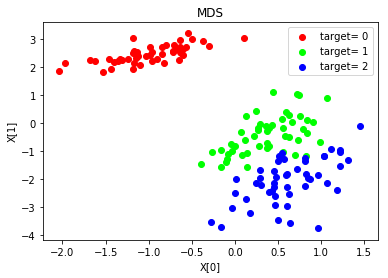

In [94]:
from sklearn import  manifold
def test_MDS(*data):
    X,y=data
    for n in [4,3,2,1]: # 依次考察降维目标为 4维、3维、2维、1维
        mds=manifold.MDS(n_components=n)
        mds.fit(X)
        print('stress(n_components=%d) : %s'% (n, str(mds.stress_)))
def plot_MDS(*data):
    X,y=data
    mds=manifold.MDS(n_components=2)
    X_r=mds.fit_transform(X) #原始数据集转换到二维

    ### 绘制二维图形
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("X[1]")
    ax.legend(loc="best")
    ax.set_title("MDS")
    plt.show()

test_MDS(X,y)   # 调用 test_MDS
plot_MDS(X,y)   # 调用 plot_MDS

In [95]:
??manifold.MDS

## 

## Isomap

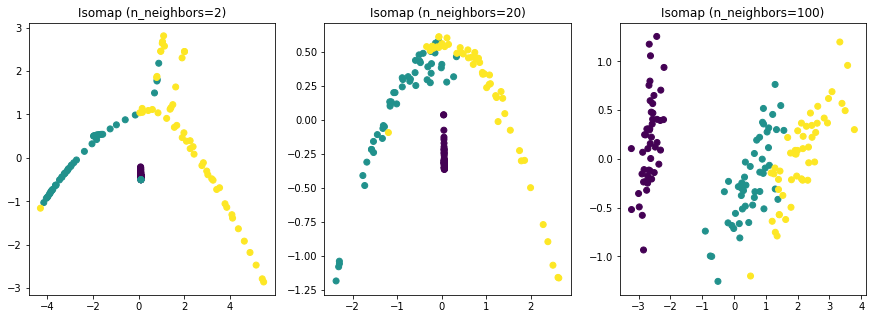

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap
iris = datasets.load_iris()
X = iris.data
y = iris.target
fig, ax = plt.subplots(1,3,figsize=(15, 5)) 
for idx, neighbor in enumerate([2, 20, 100]): 
    isomap = Isomap( n_components=2, n_neighbors=neighbor)
    new_X_isomap = isomap.fit_transform(X)

    ax[idx].scatter(new_X_isomap[:,0], new_X_isomap[:,1], c=y)
    ax[idx].set_title("Isomap (n_neighbors=%d)"%neighbor)
plt.show()

In [3]:
??Isomap

## lle

reconstruction_error(n_components=4) : 1.7884357019445617e-06
reconstruction_error(n_components=3) : 3.9929058029562356e-07
reconstruction_error(n_components=2) : 6.641420471646159e-08
reconstruction_error(n_components=1) : 4.1425935405252467e-16


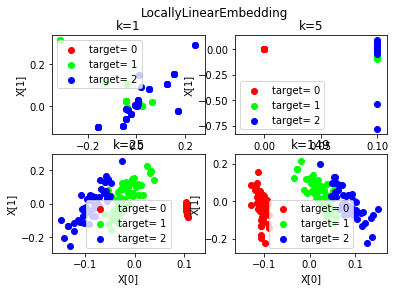

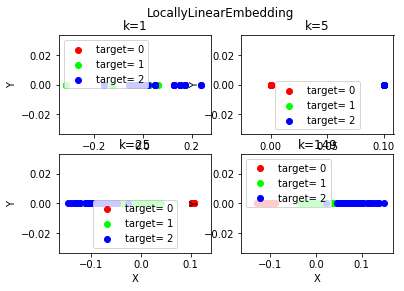

In [96]:
def test_LocallyLinearEmbedding(*data):
    X,y=data
    for n in [4,3,2,1]:# 依次考察降维目标为 4维、3维、2维、1维
        lle=manifold.LocallyLinearEmbedding(n_components=n)
        lle.fit(X)
        print('reconstruction_error(n_components=%d) : %s'%
            (n, lle.reconstruction_error_))
# 测试 LocallyLinearEmbedding 中 n_neighbors 参数的影响，其中降维至 2维
def plot_LocallyLinearEmbedding_k(*data):
    X,y=data
    Ks=[1,5,25,y.size-1]# n_neighbors参数的候选值的集合

    fig=plt.figure()
    for i, k in enumerate(Ks):
        lle=manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=k)
        X_r=lle.fit_transform(X)#原始数据集转换到二维
        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示不同 n_neighbors 参数的 LocallyLinearEmbedding 的效果图
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
            (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"
            %label,color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()
# 测试 LocallyLinearEmbedding 中 n_neighbors 参数的影响，其中降维至 1维
def plot_LocallyLinearEmbedding_k_d1(*data):
    X,y=data
    Ks=[1,5,25,y.size-1]# n_neighbors参数的候选值的集合
    fig=plt.figure()
    for i, k in enumerate(Ks):
        lle=manifold.LocallyLinearEmbedding(n_components=1,n_neighbors=k)
        X_r=lle.fit_transform(X)#原始数据集转换到 1 维

        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示不同 n_neighbors 参数的 LocallyLinearEmbedding 的效果图
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
            (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position],np.zeros_like(X_r[position]),
            label="target= %d"%label,color=color)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()
test_LocallyLinearEmbedding(X,y)   # 调用 test_LocallyLinearEmbedding
plot_LocallyLinearEmbedding_k(X,y)   # 调用 plot_LocallyLinearEmbedding_k
plot_LocallyLinearEmbedding_k_d1(X,y)   # 调用 plot_LocallyLinearEmbedding_k_d1

# 特征选择

## 过滤式特征选取 

In [98]:
from sklearn.feature_selection import  VarianceThreshold,SelectKBest,f_classif
# 通过方差过滤特征
def test_VarianceThreshold():
    X=[[100,1,2,3],
       [100,4,5,6],
       [100,7,8,9],
       [101,11,12,13]]
    selector=VarianceThreshold(1)
    selector.fit(X)
    print("Variances is %s"%selector.variances_)
    print("After transform is %s"%selector.transform(X))
    print("The surport is %s"%selector.get_support(True))
    print("After reverse transform is %s"%
            selector.inverse_transform(selector.transform(X)))
test_VarianceThreshold()

Variances is [ 0.1875 13.6875 13.6875 13.6875]
After transform is [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]]
The surport is [1 2 3]
After reverse transform is [[ 0  1  2  3]
 [ 0  4  5  6]
 [ 0  7  8  9]
 [ 0 11 12 13]]


In [99]:
??VarianceThreshold

In [100]:
def test_SelectKBest():
    X=[   [1,2,3,4,5],
          [5,4,3,2,1],
          [3,3,3,3,3,],
          [1,1,1,1,1] ]
    y=[0,1,0,1]
    print("before transform:",X)
    selector=SelectKBest(score_func=f_classif,k=3)
    selector.fit(X,y)
    print("scores_:",selector.scores_)
    print("pvalues_:",selector.pvalues_)
    print("selected index:",selector.get_support(True))
    print("after transform:",selector.transform(X))
test_SelectKBest()

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]]
scores_: [0.2 0.  1.  8.  9. ]
pvalues_: [0.69848865 1.         0.42264974 0.10557281 0.09546597]
selected index: [2 3 4]
after transform: [[3 4 5]
 [3 2 1]
 [3 3 3]
 [1 1 1]]


In [101]:
??SelectKBest

## 包裹选择

In [105]:
from sklearn.feature_selection import  RFE
from sklearn.svm import LinearSVC
from sklearn.datasets import  load_iris
from sklearn.model_selection import train_test_split
def test_RFE():
    iris=load_iris()
    X=iris.data
    y=iris.target
    estimator=LinearSVC()
    selector=RFE(estimator=estimator,n_features_to_select=2)
    selector.fit(X,y)
    print("N_features %s"%selector.n_features_)
    print("Support is %s"%selector.support_)
    print("Ranking %s"%selector.ranking_)
def test_compare_with_no_feature_selection():
    ### 加载数据
    iris=load_iris()
    X,y=iris.data,iris.target
    ### 特征提取
    estimator=LinearSVC()
    selector=RFE(estimator=estimator,n_features_to_select=2)
    X_t=selector.fit_transform(X,y)
    #### 切分测试集与验证集
    X_train,X_test,y_train,y_test=train_test_split(X, y,
                test_size=0.25,random_state=0,stratify=y)
    X_train_t,X_test_t,y_train_t,y_test_t=train_test_split(X_t, y,
                test_size=0.25,random_state=0,stratify=y)
    ### 测试与验证
    clf=LinearSVC()
    clf_t=LinearSVC()
    clf.fit(X_train,y_train)
    clf_t.fit(X_train_t,y_train_t)
    print("Original DataSet: test score=%s"%(clf.score(X_test,y_test)))
    print("Selected DataSet: test score=%s"%(clf_t.score(X_test_t,y_test_t)))
test_RFE() # 调用 test_RFE
test_compare_with_no_feature_selection() # 调用 test_compare_with_no_feature_selection

N_features 2
Support is [False  True False  True]
Ranking [3 1 2 1]
Original DataSet: test score=0.9473684210526315
Selected DataSet: test score=0.9473684210526315


In [106]:
??RFE

## 嵌入式特征选取

Threshold 0.6813517379826572
Support is [ 2  3  4  5  6  9 12 13 14 16 18 19 20 21 22 24 26 27 30 33 36 38 41 42
 43 44 45 53 54 55 61]


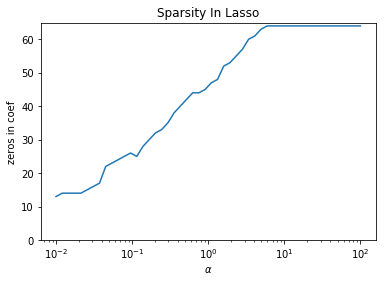

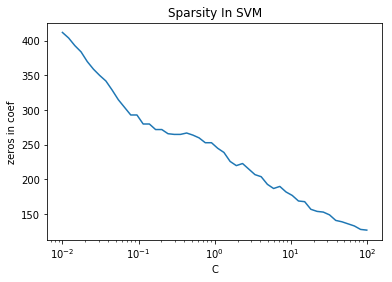

In [110]:

from sklearn.feature_selection import  SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.datasets import  load_digits,load_diabetes
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
# 加载数据
digits=load_digits()
X=digits.data
y=digits.target
def test_SelectFromModel():
    estimator=LinearSVC(penalty='l1',dual=False)
    selector=SelectFromModel(estimator=estimator,threshold='mean')
    selector.fit(X,y)
    selector.transform(X)
    print("Threshold %s"%selector.threshold_)
    print("Support is %s"%selector.get_support(indices=True))
# 测试 alpha 与稀疏性的关系
def test_Lasso():
    alphas=np.logspace(-2,2)
    zeros=[]
    for alpha in alphas:
        regr=Lasso(alpha=alpha)
        regr.fit(X,y)
        ### 计算零的个数 ###
        num=0
        for ele in regr.coef_:
            if abs(ele) < 1e-5:num+=1
        zeros.append(num)
    ##### 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,zeros)
    ax.set_xlabel(r"$\alpha$")
    ax.set_xscale("log")
    ax.set_ylim(0,X.shape[1]+1)
    ax.set_ylabel("zeros in coef")
    ax.set_title("Sparsity In Lasso")
    plt.show()
    
# 测试 C  与 稀疏性的关系
def test_LinearSVC():
    Cs=np.logspace(-2,2)
    zeros=[]
    for C in Cs:
        clf=LinearSVC(C=C,penalty='l1',dual=False)
        clf.fit(X,y)
         ### 计算零的个数 ###
        num=0
        for row in clf.coef_:
            for ele in row:
                if abs(ele) < 1e-5:num+=1
        zeros.append(num)
    ##### 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,zeros)
    ax.set_xlabel("C")
    ax.set_xscale("log")
    ax.set_ylabel("zeros in coef")
    ax.set_title("Sparsity In SVM")
    plt.show()
test_SelectFromModel() # 调用 test_SelectFromModel
test_Lasso() # 调用 test_Lasso
test_LinearSVC() # 调用 test_LinearSVC

In [111]:
??SelectFromModel